In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Section 1

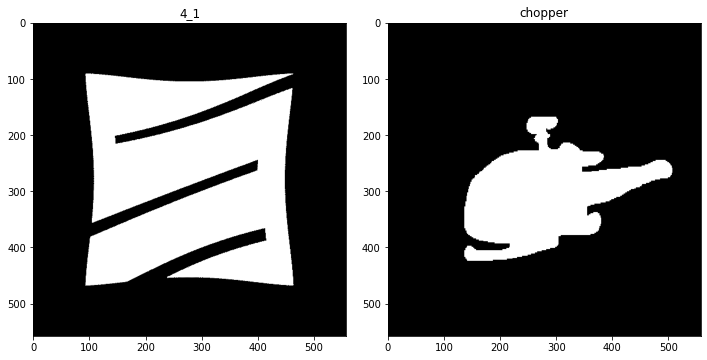

In [2]:
four = cv.imread('./4_1.png', cv.IMREAD_GRAYSCALE)
chopper = cv.imread('./chopper.png', cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout()

ax[0].imshow(four, cmap='gray')
ax[0].set_title('4_1')

ax[1].imshow(chopper, cmap='gray')
ax[1].set_title('chopper')
plt.show()

## Section 2

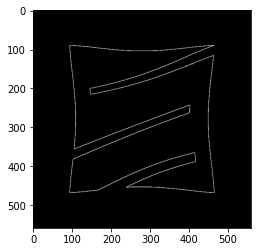

In [3]:
kernel = np.ones((3, 3), dtype=np.uint8)
eroded_four = cv.erode(four, kernel, iterations = 1)
four_boundary = four - eroded_four
plt.imshow(four_boundary, cmap='gray');

## Section 3

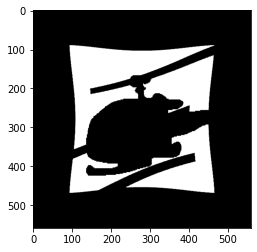

In [4]:
def subtract(img1, img2):
    return np.where(img2 > img1, 0, img1 - img2)
plt.imshow(subtract(four, chopper), cmap='gray');

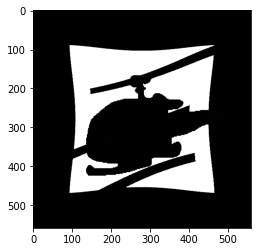

In [5]:
plt.imshow(four - chopper, cmap='gray');

* if both images are binary there is no diffrence

## Section 4

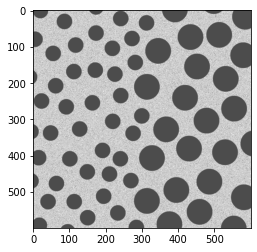

In [6]:
blobs = cv.imread('./Blobs.png', cv.IMREAD_GRAYSCALE)
plt.imshow(blobs, cmap='gray', vmin=0, vmax=255);

## Section 5

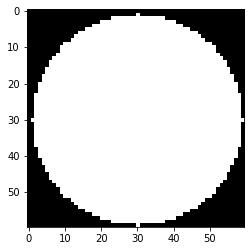

In [7]:
def distance(i, j, shape):
    cx, cy = shape[0] // 2, shape[1] // 2
    return ((i - cx) ** 2 + (j - cy) ** 2) ** 0.5
def kernel(shape, r):
    return np.fromfunction(lambda i,j: distance(i, j, shape) ** 2 <= r ** 2, shape).astype(np.uint8) * 255
plt.imshow(kernel((60, 60), 29), cmap="gray", vmin=0, vmax=255);

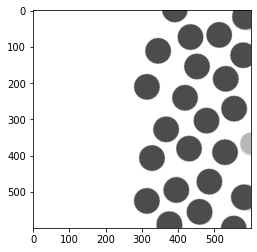

In [8]:
closed_blobs = cv.morphologyEx(blobs, cv.MORPH_CLOSE, kernel((60, 60), 29))
plt.imshow(closed_blobs, cmap='gray', vmin=0, vmax=255);

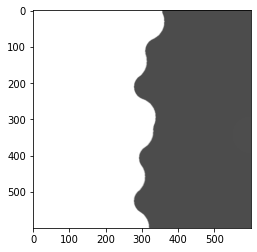

In [9]:
opened_closed_blobs = cv.morphologyEx(closed_blobs, cv.MORPH_OPEN, kernel((103, 103), 51))
plt.imshow(opened_closed_blobs, cmap='gray', vmin=0, vmax=255);

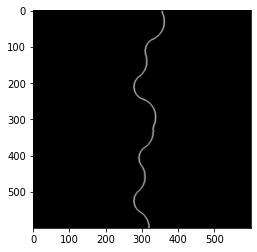

In [10]:
boundary = cv.morphologyEx(opened_closed_blobs, cv.MORPH_GRADIENT, kernel((5, 5), 2))
plt.imshow(boundary, cmap='gray', vmin=0, vmax=255);

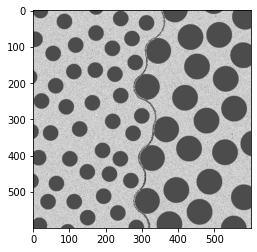

In [11]:
boundaried_blobs = blobs + boundary
plt.imshow(boundaried_blobs, cmap='gray', vmin=0, vmax=255);

## Section 6

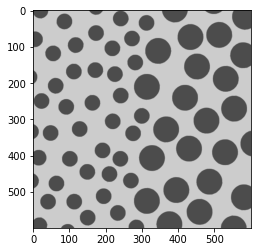

In [12]:
smoothed_blobs = cv.medianBlur(blobs,5)
plt.imshow(smoothed_blobs, cmap='gray', vmin=0, vmax=255);

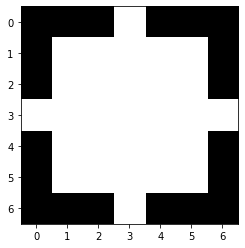

In [13]:
img = np.copy(smoothed_blobs)
def disk(r):
    return kernel((2 *r + 1, 2 * r + 1), r)
plt.imshow(disk(3), cmap='gray', vmin=0, vmax=255);

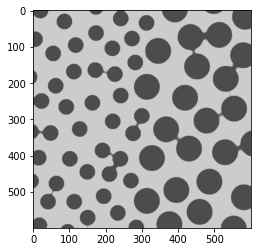

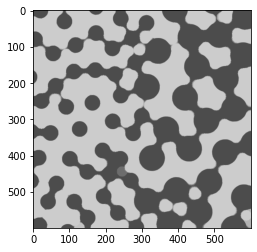

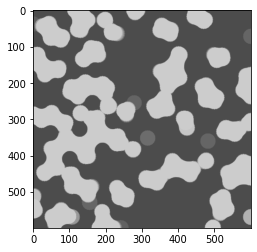

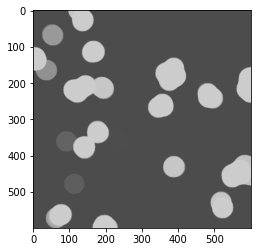

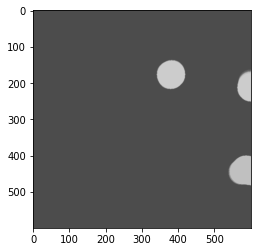

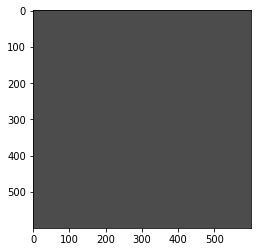

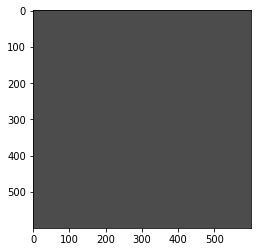

In [14]:
images = []
areas = []
for r in range(2, 50):
    img = cv.morphologyEx(img, cv.MORPH_OPEN, disk(r))
    surface_area = np.sum(img)
    images.append(np.copy(img))
    areas.append(surface_area)
    if r % 7 == 0:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.show()

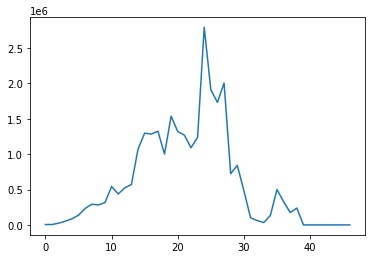

In [15]:
diff = [areas[i-1] - areas[i] for i in range(1, len(areas))]
plt.plot(diff);

* by filtering circles by radius between 15 and 30 we have meaningfull changes so we can estimate that most of circles have radius in `[15, 30]`

In [16]:
from IPython.display import Image as IPyImage
import imageio
imageio.mimsave("./animation.gif", images, fps=2)

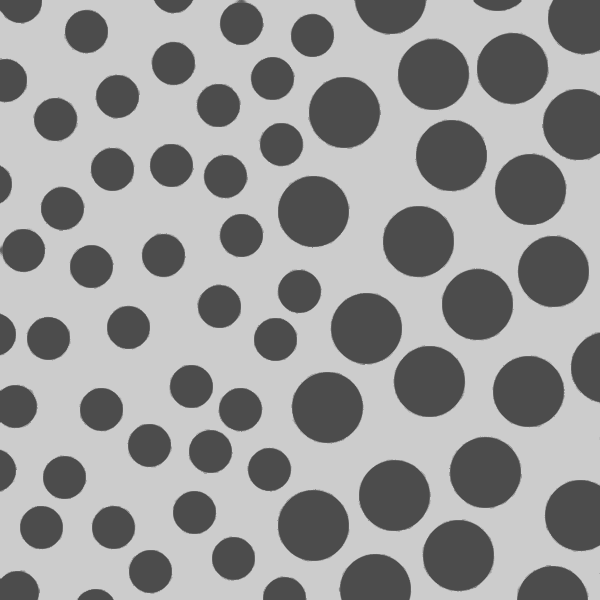

In [17]:
SCALE = 30

# FYI, the format is set to PNG here to bypass checks for acceptable embeddings
IPyImage("./animation.gif", format='png', width=15 * SCALE, height=3 * SCALE) 